# Question 2

Microsoft called us for help. They built a studio and would like to start producing movies. They're asking what the best films are and how they can make great films. Using provided data, we will give our best recommendations. 

# Does release date impact profit?

### Let's start by importing our data. 

In [1]:
import patoolib
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!ls

CONTRIBUTING.md
LICENSE.md
Project Cleaning Rotten Tomatoes Only.ipynb
Project Cleaning.ipynb
Project Instructions.md
Question 1.ipynb
Question 2 .ipynb
Question 3.ipynb
Question 4.ipynb
README.md
awesome.gif
data
project_pdf_submission.gif
repo_pdf.gif
student.ipynb
video_recording_submission.gif
zippedData


In [3]:
cd\zippedData

/Users/jaklynsoler/flatiron/class-material/section01/PROJECT_ONE/dsc-phase-1-project-online/zippedData


In [4]:
cd\unzipped

/Users/jaklynsoler/flatiron/class-material/section01/PROJECT_ONE/dsc-phase-1-project-online/zippedData/unzipped


This snippet below will allow us to view up to 100 rows of data without it being truncated. 

In [5]:
pd.options.display.max_rows = 100

### It looks like the movie_budgets dataframe below will allow us to calculate profit by release date. 

In [6]:
movie_budgets = pd.read_csv('tn.movie_budgets.csv')
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### First, we will select the columns of the dataframe that we want to keep.

In [7]:
movie_budgets = movie_budgets[['movie', 'production_budget', 'domestic_gross', 'worldwide_gross', 'release_date']]

### Let's format the release dates.

In [8]:
movie_budgets['release_date'] = pd.to_datetime(movie_budgets['release_date'],
                                            format = '%b %d, %Y')

### We will add another column to sort the data by the day of the week. 

In [9]:
movie_budgets['release_day_of_week'] = pd.to_datetime(movie_budgets['release_date']).dt.strftime('%w')

### We will add one more column to sort the data by the week of the year.

In [10]:
movie_budgets['release_week'] = pd.to_datetime(movie_budgets['release_date']).dt.strftime('%W')

### ... And the last column will be for understanding the release year. 

In [11]:
movie_budgets['release_year'] = pd.to_datetime(movie_budgets['release_date']).dt.strftime('%Y')

In [12]:
movie_budgets.head()

,movie,production_budget,domestic_gross,worldwide_gross,release_date,release_day_of_week,release_week,release_year
0,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009-12-18,5,50,2009
1,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011-05-20,5,20,2011
2,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019-06-07,5,22,2019
3,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015-05-01,5,17,2015
4,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017-12-15,5,50,2017


### Let's take a look at the day of the week where most movies are released.

For day of the week, 0 represents Sunday. As we can see from our value counts, the vast majority of movies are released on Friday. That being said, I would assume that is because the rest of the industry already knows that Friday is the best day of the week for a movie release.

In [13]:
weekday_qty = movie_budgets['release_day_of_week'].value_counts().sort_index()
# 0 is Sunday

In [14]:
weekday_qty[0:7]

0      45
1      59
2     290
3     621
4     172
5    4539
6      56
Name: release_day_of_week, dtype: int64

In [15]:
day_qty = weekday_qty.to_frame(name = 'Qty')

In [16]:
day_qty.head()

,Qty
0,45
1,59
2,290
3,621
4,172


In [17]:
day_qty.set_index('Qty')

""
Qty
45
59
290
621
172
4539
56


In [18]:
day_qty.reset_index(inplace = True)

In [19]:
day_qty

,index,Qty
0,0,45
1,1,59
2,2,290
3,3,621
4,4,172
5,5,4539
6,6,56


In [20]:
day_qty.rename(columns={'index' : 'Weekday'}, inplace = True)

In [21]:
day_qty.head()

,Weekday,Qty
0,0,45
1,1,59
2,2,290
3,3,621
4,4,172


### Now, back to the profits! Let's whip those dollar values into shape. 

We will remove the commas and dollar signs so that we can put the values into mathematical equations. 

In [22]:
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace(',', '')
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace('$', '')
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.replace(',', '')
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.replace('$', '')
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace(',', '')
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace('$', '')
movie_budgets['production_budget'].astype(float)
movie_budgets['domestic_gross'].astype(float)
movie_budgets['worldwide_gross'].astype(float)

0       2.776345e+09
1       1.045664e+09
2       1.497624e+08
3       1.403014e+09
4       1.316722e+09
            ...     
5777    0.000000e+00
5778    2.404950e+05
5779    1.338000e+03
5780    0.000000e+00
5781    1.810410e+05
Name: worldwide_gross, Length: 5782, dtype: float64

### Hmm.. It looks like we have a few zeros to get rid of in the worldwide gross column.

In [23]:
movie_budgets['worldwide_gross'].value_counts()

0            367
8000000        9
7000000        6
2000000        6
10000000       4
            ... 
212400000      1
2154540        1
49486874       1
177835231      1
461651246      1
Name: worldwide_gross, Length: 5356, dtype: int64

### We're going to delete the rows that have a zero by converting them to NaN values, and deleting them.

In [24]:
for cell in movie_budgets.columns:
    movie_budgets['worldwide_gross'].replace('0', np.nan, inplace=True)

In [25]:
movie_budgets.dropna(inplace = True)

### Nice! That did the trick. 

In [26]:
movie_budgets['worldwide_gross'].value_counts()

8000000      9
2000000      6
7000000      6
4000000      4
10000000     4
            ..
212400000    1
2154540      1
49486874     1
177835231    1
461651246    1
Name: worldwide_gross, Length: 5355, dtype: int64

### Time to calculate the profit! 
We're adding a new column called profit which will be the difference between the worldwide gross and the production budget columns. First the datatypes in the columns will be converted from strings to integers. 

In [27]:
type(movie_budgets.production_budget[0])

str

In [28]:
type(movie_budgets.worldwide_gross[0])

str

In [29]:
movie_budgets['profit'] = movie_budgets['worldwide_gross'].astype(int) - movie_budgets['production_budget'].astype(int)

In [30]:
movie_budgets.head()

,movie,production_budget,domestic_gross,worldwide_gross,release_date,release_day_of_week,release_week,release_year,profit
0,Avatar,425000000,760507625,2776345279,2009-12-18,5,50,2009,2351345279
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011-05-20,5,20,2011,635063875
2,Dark Phoenix,350000000,42762350,149762350,2019-06-07,5,22,2019,-200237650
3,Avengers: Age of Ultron,330600000,459005868,1403013963,2015-05-01,5,17,2015,1072413963
4,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017-12-15,5,50,2017,999721747


### Great! Now, let's see if there are any other NaN values!

In [31]:
movie_budgets['profit'].isna().sum()

0

In [32]:
movie_budgets['domestic_gross'].isna().sum()

0

In [33]:
movie_budgets['production_budget'].isna().sum()

0

### Let's convert the profit and production budget columns to integers in order to calculate a profit quotient.

In [34]:
movie_budgets['production_budget'] = movie_budgets['production_budget'].astype(int)

In [35]:
movie_budgets['profit'] = movie_budgets['profit'].map(int)

### We are going to divide profit by budget and multiply by 100 to determine profit margin.

In [36]:
movie_budgets['profit_percentage'] = (movie_budgets.profit / movie_budgets.production_budget) * 100

In [37]:
movie_budgets.head()

,movie,production_budget,domestic_gross,worldwide_gross,release_date,release_day_of_week,release_week,release_year,profit,profit_percentage
0,Avatar,425000000,760507625,2776345279,2009-12-18,5,50,2009,2351345279,553.257713
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011-05-20,5,20,2011,635063875,154.667286
2,Dark Phoenix,350000000,42762350,149762350,2019-06-07,5,22,2019,-200237650,-57.210757
3,Avengers: Age of Ultron,330600000,459005868,1403013963,2015-05-01,5,17,2015,1072413963,324.384139
4,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017-12-15,5,50,2017,999721747,315.369636


### The movies before 2000 can be removed.

In [117]:
for val in movie_budgets.release_year.astype(int): 
    if val < 2000:
        movie_budgets['release_year'].replace(val, np.nan, inplace=True)

### Now, we can find the profit margin average sorted by day of the week. 

In [38]:
profit_by_day = movie_budgets.groupby('release_day_of_week').profit_percentage.mean()

In [40]:
by_day_df = profit_by_day.to_frame(name = 'Average Profit')

In [41]:
by_day_df.set_index('Average Profit')

""
Average Profit
1163.384533
662.341173
607.697592
577.571714
727.756377
360.230852
964.254893


In [42]:
by_day_df.reset_index(inplace=True)

In [49]:
by_day_df.rename(columns={'release_day_of_week' : 'Weekday'}, inplace = True)

In [51]:
by_day_df.head()

,Weekday,Average Profit
0,0,1163.384533
1,1,662.341173
2,2,607.697592
3,3,577.571714
4,4,727.756377


### A dataframe for the day by quantity can also be configured and joined to the dataframe by_day_df. 

In [58]:
movie_day_counts = movie_budgets['release_day_of_week'].value_counts().sort_index()

In [63]:
day_movie_counts = movie_day_counts.to_frame(name = 'Movie Quantity')

In [65]:
day_movie_counts.reset_index(inplace = True)

In [68]:
day_movie_counts.rename(columns = {'index' : 'Weekday'}, inplace = True)

In [70]:
day_movie_counts.set_index('Weekday', inplace = True)

In [71]:
by_day_df.set_index('Weekday', inplace = True)

In [72]:
all_day_df = by_day_df.join(day_movie_counts, how = 'inner', lsuffix = 'x')

In [74]:
all_day_df.reset_index(inplace = True)

In [75]:
all_day_df.head()

,Weekday,Average Profit,Movie Quantity
0,0,1163.384533,40
1,1,662.341173,37
2,2,607.697592,149
3,3,577.571714,585
4,4,727.756377,141


### The same dataframe can be created for weeks of the year. 

In [78]:
movie_week_counts = movie_budgets['release_week'].value_counts().sort_index()

In [54]:
movie_week_df = movie_week_counts.to_frame()

In [55]:
movie_week_df.reset_index(inplace=True)

In [77]:
movie_week_df.rename(columns={'index': 'Week of Year', 'release_week': 'Movie Quantity'}, inplace = True)

In [84]:
profit_by_week = movie_budgets.groupby('release_week').profit_percentage.mean()

In [85]:
profit_by_week.head()

release_week
00    1025.472764
01     396.459837
02     192.141122
03     274.524210
04     177.741545
Name: profit_percentage, dtype: float64

In [99]:
weekly_profit = profit_by_week.to_frame(name='Average Profit')

In [100]:
weekly_profit.reset_index(inplace = True)

In [101]:
weekly_profit.rename(columns={'release_week' : 'Week of Year'}, inplace = True)

In [104]:
movie_week_df.set_index('Week of Year', inplace = True)

In [105]:
weekly_profit.set_index('Week of Year', inplace = True)

In [113]:
all_week_df = weekly_profit.join(movie_week_df, how = 'inner', lsuffix = 'x')

In [114]:
all_week_df.reset_index(inplace = True)

In [115]:
all_week_df.head()

,Week of Year,Average Profit,Movie Quantity
0,00,1025.472764,44
1,01,396.459837,53
2,02,192.141122,87
3,03,274.524210,77
4,04,177.741545,81


### The data sorted by week can now be plotted. 

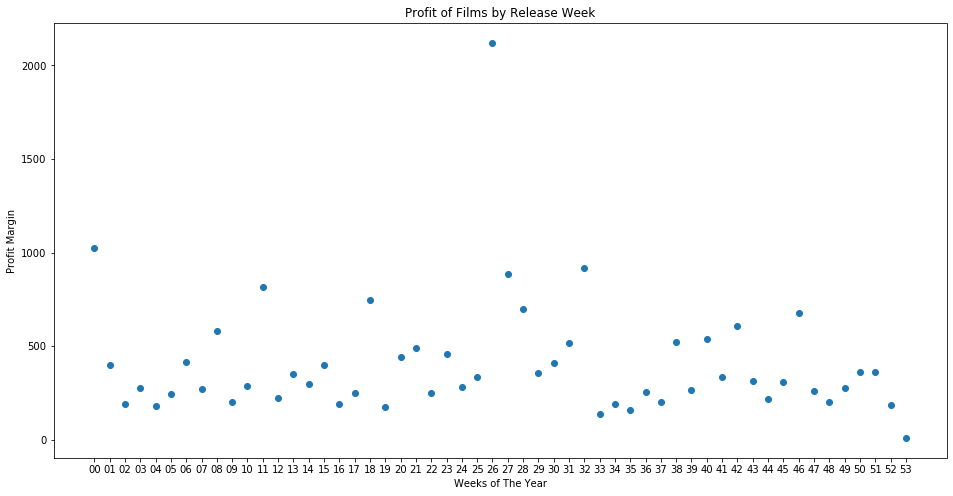

In [120]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(all_week_df['Week of Year'], all_week_df['Average Profit'])
ax.set_xlabel('Weeks of The Year')
ax.set_ylabel('Profit Margin')
plt.title('Profit of Films by Release Week')
plt.show()

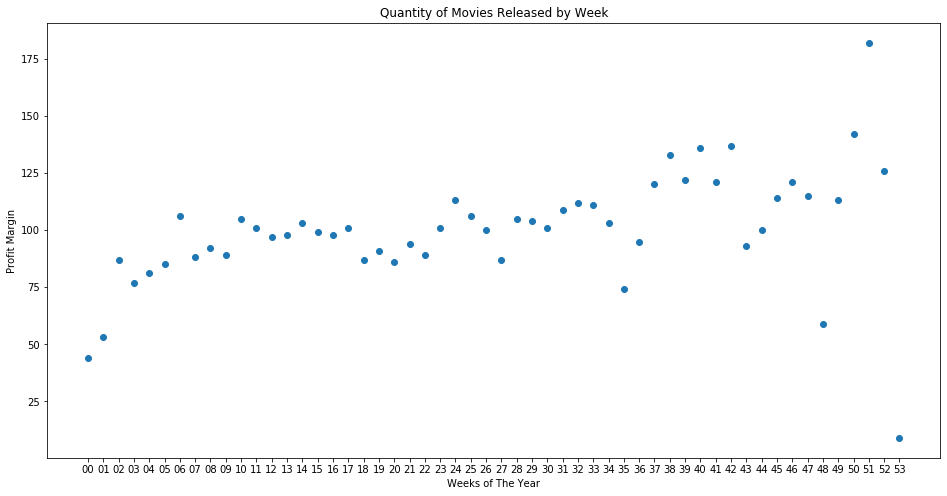

In [122]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(all_week_df['Week of Year'], all_week_df['Movie Quantity'])
ax.set_xlabel('Weeks of The Year')
ax.set_ylabel('Profit Margin')
plt.title('Quantity of Movies Released by Week')
plt.show()

### The data sorted by weekday can now be plotted. 

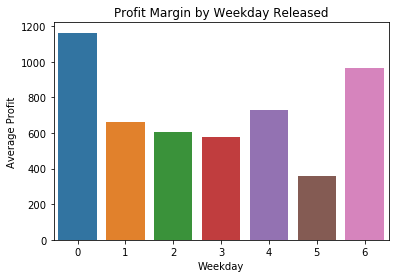

In [124]:
sns.barplot(y = 'Average Profit', x = 'Weekday', data = all_day_df)

plt.title('Profit Margin by Weekday Released')

plt.show()

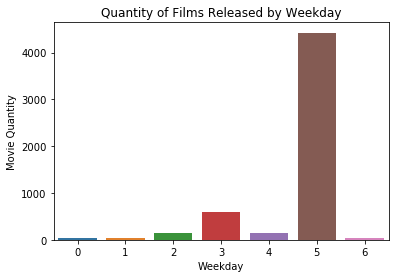

In [125]:
sns.barplot(y = 'Movie Quantity', x = 'Weekday', data = all_day_df)

plt.title('Quantity of Films Released by Weekday')

plt.show()

### It looks like the average profit margin for Friday is far under the mean.

In [128]:
all_day_df['Average Profit'].describe()

count       7.000000
mean      723.319591
std       265.169552
min       360.230852
25%       592.634653
50%       662.341173
75%       846.005635
max      1163.384533
Name: Average Profit, dtype: float64

# Conclusion

We did not find a significant correlation between the week of release and profit margin. However when it comes to the day of the week that a movie is realeased, it seems that there could be a correlation between the quantity of films released on a Friday, and the low average profit of films released on Friday. In the media, box office weekends are overemphasized. We have no reason to believe that the first day of release contributes to gross profit at a higher rate than the second or third day. 
In conclusion, my recommendation for Microsoft is to follow suit in releasing a movie on a Friday since that is the industry standard. Additionally, I would encourage Microsoft to be wary of the competition that may be lurking in the same weekend- especially films with the same target audience. 